In [1]:
# Useful starting lines
%matplotlib inline

import random
from datetime import datetime
from helpers import *
import numpy as np
import copy
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Support Vector Machines
## Classification Using SVM
Load dataset. We will re-use the CERN dataset from project 1, available from https://inclass.kaggle.com/c/epfml-project-1/data

In [2]:
#from keras.datasets import mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

y, X, _  = load_csv_data('train.csv')

#y, X, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)
#print(y.shape, X.shape)

In [5]:
X.shape

(250000, 30)

## Prepare cost and prediction functions

In [6]:
def hinge_loss(y, X, w):
    return np.clip(1 - y * (X @ w), 0, np.inf)

In [7]:
def calculate_primal_objective(y, X, w, lambda_):
    """compute the full cost (the primal objective), that is loss plus regularizer.
    X: the full dataset matrix, shape = (num_examples, num_features)
    y: the corresponding +1 or -1 labels, shape = (num_examples)
    w: shape = (num_features)
    """
    v = hinge_loss(y, X, w)
    return np.sum(v) + lambda_ / 2 * np.sum(w ** 2)

In [8]:
def accuracy(y1, y2):
    return np.mean(y1 == y2)

def prediction(X, w):
    return (X @ w > 0) * 2 - 1

def calculate_accuracy(y, X, w):
    """compute the training accuracy on the training set (can be called for test set as well).
    X: the full dataset matrix, shape = (num_examples, num_features)
    y: the corresponding +1 or -1 labels, shape = (num_examples)
    w: shape = (num_features)
    """
    predicted_y = prediction(X, w)
    return accuracy(predicted_y, y)

## Stochastic Gradient Descent for SVM

Compute the (stochastic) subgradient for the n-th summand of the SVM optimization objective

In [29]:
def calculate_stochastic_gradient(y, X, w, lambda_, n, num_examples):
    """compute the stochastic gradient of loss plus regularizer.
    X: the dataset matrix, shape = (num_examples, num_features)
    y: the corresponding +1 or -1 labels, shape = (num_examples)
    w: shape = (num_features)
    n: the index of the (one) datapoint we have sampled
    num_examples: N
    """
    # Be careful about the constant N (size) term!
    # The complete objective for SVM is a sum, not an average as in earlier SGD examples!
    def is_support(y_n, x_n, w):
        """a datapoint is support if max{} is not 0. """
        return y_n * x_n @ w < 1
    
    x_n, y_n = X[n], y[n]
    grad = - y_n * x_n.T if is_support(y_n, x_n, w) else np.zeros_like(x_n.T)
    grad = num_examples * np.squeeze(grad) + lambda_ * w
    return grad

def approximate_stochastic_gradient(y, X, w, lambda_, n, num_examples, diff_type='backward', h=0.005, last_w=None):
    """compute finite difference approximation of the stochastic gradient of loss plus regularizer.
    X: the dataset matrix, shape = (num_examples, num_features)
    y: the corresponding +1 or -1 labels, shape = (num_examples)
    w: shape = (num_features)
    n: the index of the (one) datapoint we have sampled
    num_examples: N
    """
    
    if last_w is None :
        last_w = np.array([(w_cur - random.random()) for w_cur in w])
    
    
    hinge_diff =  hinge_loss(y[n], X[n], w) -  hinge_loss(y[n], X[n], last_w)
    
    sub = np.array(last_w) - np.array(w)
    print("w="+str(w))
    print("last_w="+str(last_w))
    print("sub=" +str(sub))
    print("hinge_diff="+str(hinge_diff))
    return(np.array([(hinge_diff / cur_sub) for cur_sub in sub ]))
    
                
        
def secant_method(w, last_w=None) :
    calculate_stochastic_gradient()
    

Implement stochastic gradient descent: Pick a data point uniformly at random and update w based on the gradient for the n-th summand of the objective

In [59]:
def newton_raphson(y, X, w, iters) :
    for i in range(iters) :
        
         n = random.randint(0,num_examples-1)
            
        w = w - hinge_loss(y, w) / f_prime(w)
        if i % 10 == 0 :
            cost = calculate_primal_objective(y, X, w, lambda_)
            acc = calculate_accuracy(y, X, w)
            print(acc)
            print("l=" +str(cost)+"acc="+str(acc))
    return x

array([1., 1., 1.])

In [35]:
def is_support(y_n, x_n, w):
        """a datapoint is support if max{} is not 0. """
        return y_n * x_n @ w < 1
    

w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
last_w=[-0.31873652 -0.41219095 -0.56542393 -0.56489856 -0.63457193 -0.6396048
 -0.37427178 -0.41529323 -0.81858621 -0.62342852 -0.86470194 -0.46826555
 -0.9432569  -0.50730216 -0.55473678 -0.14946797 -0.74838531 -0.04647632
 -0.70002547 -0.97654411 -0.82212262 -0.69477986 -0.66168501 -0.45275717
 -0.97885178 -0.65520013 -0.35209931 -0.1521637  -0.86945907 -0.23293832]
sub=[-0.31873652 -0.41219095 -0.56542393 -0.56489856 -0.63457193 -0.6396048
 -0.37427178 -0.41529323 -0.81858621 -0.62342852 -0.86470194 -0.46826555
 -0.9432569  -0.50730216 -0.55473678 -0.14946797 -0.74838531 -0.04647632
 -0.70002547 -0.97654411 -0.82212262 -0.69477986 -0.66168501 -0.45275717
 -0.97885178 -0.65520013 -0.35209931 -0.1521637  -0.86945907 -0.23293832]
hinge_diff=-6092.189728321929
grad=[ 19113.560528    14780.0182715   10774.55236362  10784.57302227
   9600.47156525   9524.92806634  16277.44892045  14669.61006706

0.367616
l=293891915645.3718acc=0.367616
w=[ -303.20123596  -253.99164291  -216.38779583  -216.4651304
  -208.22172598  -207.76510302  -270.33251677  -252.82292192
  -199.91938027  -209.29306066  -199.83915107  -236.00415642
  -200.94438745  -226.6924601   -218.01283152  -584.06868883
  -201.34659524 -1827.18413213  -203.46173487  -201.80846035
  -199.89131983  -203.7565727   -205.95054241  -240.3693845
  -201.87607612  -206.45259335  -281.96427667  -574.35122933
  -199.86416852  -390.92767589]
last_w=[ -298.53783504  -247.96091993  -208.11513701  -208.20015825
  -198.93736998  -198.40711154  -264.85658525  -246.74680978
  -187.94273032  -200.1717427   -187.18778668  -229.1530117
  -187.1436937   -219.27017477  -209.89653527  -581.88183843
  -190.39704745 -1826.50414185  -193.21973486  -187.52074482
  -187.86292912  -193.5913207   -196.26949771  -233.74514131
  -187.55459737  -196.8664283   -276.8127482   -572.12493804
  -187.14320313  -387.51957953]
sub=[ 4.66340092  6.03072297  8.272

 18621.93372826  4989.03523689]
w=[ -341.24370999  -288.8674574   -250.53873831  -250.61320832
  -242.95837048  -242.5586596   -306.11722347  -287.64181564
  -237.60714821  -243.90994905  -238.47392611  -270.17644314
  -241.3210989   -260.70787366  -252.11088406  -647.72836302
  -237.72808314 -2017.61151983  -239.06073122  -242.96434209
  -237.64943773  -239.27747411  -241.01335348  -274.67304173
  -243.08677433  -241.43312332  -318.49578383  -637.05912382
  -238.60008552  -436.28930814]
last_w=[ -338.88969372  -285.82323703  -246.36282166  -246.44117179
  -238.27176396  -237.83488297  -303.35305368  -284.57468349
  -231.56151125  -239.30564173  -232.08770321  -266.71808593
  -234.35471143  -256.96121305  -248.01389694  -646.62447306
  -232.20091227 -2017.26827072  -233.89072006  -235.75211317
  -231.57768279  -234.14620423  -236.12650433  -271.32922108
  -235.85750224  -236.59416802  -315.89536793  -635.93532468
  -232.17872906  -434.56895116]
sub=[2.35401628 3.04422036 4.17591665 4.1

sub=[ 2.46243944  1.90414025  1.38810781  1.38939879  1.23684856  1.22711613
  2.09705733  1.88991613  0.95881088  1.25895648  0.9076762   1.67612024
  0.83208443  1.54714375  1.41485007  5.25108729  1.04875037 16.88750956
  1.12120116  0.80372137  0.95468651  1.12966627  1.18616768  1.73353272
  0.80182658  1.19790785  2.22911363  5.15805922  0.90270997  3.36943006]
hinge_diff=14701.276456090622
grad=[ 5970.2083393   7720.68994516 10590.87511081 10581.03442968
 11886.07639556 11980.34648275  7010.43136524  7778.79834136
 15332.82183537 11677.35082782 16196.60898258  8771.01541274
 17668.01061109  9502.20462598 10390.69562872  2799.66331855
 14017.89867058   870.54141407 13112.07742156 18291.5086898
 15399.06171686 13013.82259245 12393.92770178  8480.53011449
 18334.73324955 12272.46027833  6595.12205164  2850.15658819
 16285.71400772  4363.13447508]
w=[ -362.20507442  -308.0301717   -269.23058648  -269.30370304
  -261.94412245  -261.5737263   -325.80116243  -306.77156108
  -258.147511

0.368424
l=372548879865.271acc=0.368424
w=[ -371.84206503  -316.75078233  -277.61595262  -277.6888207
  -270.41671909  -270.05640383  -334.79535223  -315.47434596
  -267.21609091  -271.28617469  -268.79110005  -297.40712902
  -272.94978334  -287.75587863  -279.15990287  -699.46875285
  -266.36933581 -2172.94535604  -267.1311486   -275.1822581
  -267.31083762  -267.29150742  -268.69990424  -302.03264979
  -275.34619202  -269.06160926  -347.81439035  -688.01903569
  -268.99313518  -472.98063272]
last_w=[ -369.74683775  -315.13059767  -276.43484688  -276.5066165
  -269.36431601  -269.01228183  -333.01101932  -313.86626425
  -266.40026304  -270.21496055  -268.01878139  -295.98096081
  -272.2417838   -286.43945324  -277.95604282  -695.00073583
  -265.47698071 -2158.57620237  -266.17714696  -274.49839196
  -266.49851908  -266.33030303  -267.69062424  -300.55763075
  -274.66393811  -268.04233985  -345.91769409  -683.63017389
  -268.22504215  -470.11367012]
sub=[ 2.09522728  1.62018465  1.1811

0.368636
l=391094031948.48615acc=0.368636
w=[ -387.23166977  -331.21609641  -292.26167696  -292.33189554
  -285.49038182  -285.16663562  -349.49296512  -329.92727508
  -283.95718876  -286.28124332  -286.02881801  -311.77208572
  -291.08234586  -302.17734541  -293.75377382  -724.08006363
  -282.40581408 -2245.37486521  -282.72678908  -293.70958375
  -284.08915659  -282.84190477  -283.97800092  -316.40136885
  -293.9011886   -284.28918904  -362.72958567  -712.27704036
  -286.28339317  -490.89369104]
last_w=[ -384.17779627  -328.85461562  -290.54017039  -290.60878792
  -283.95646429  -283.64478806  -346.892232    -327.58343478
  -282.76808859  -284.71990794  -284.90313417  -309.69339127
  -290.05040958  -300.25860531  -291.99910198  -717.56775877
  -281.10517256 -2224.43127685  -281.33629539  -292.71282284
  -282.9051714   -281.44091279  -282.5069369   -314.25147246
  -292.90677757  -282.80356508  -359.96507868  -705.88010726
  -285.16386835  -486.71498394]
sub=[ 3.0538735   2.36148079  1

0.368704
l=405323121795.44666acc=0.368704
w=[ -399.74732759  -342.61018626  -303.31138771  -303.38099718
  -296.69007829  -296.38202696  -361.21634282  -341.30025913
  -296.02188991  -297.44828183  -298.37969481  -322.89352552
  -303.96378634  -313.22035109  -304.79289415  -745.27877352
  -294.08015186 -2309.05362902  -294.17148359  -306.82957618
  -296.17504323  -294.26395885  -295.26879614  -327.57706969
  -307.03798643  -295.55676714  -374.71755362  -733.15552943
  -298.66494577  -505.9150931 ]
last_w=[ -397.42653294  -340.81557623  -302.00312683  -302.07151958
  -295.52437591  -295.22549717  -359.23991272  -339.51905502
  -295.11823188  -296.26174322  -297.52423009  -321.3138193
  -303.17956519  -311.76220236  -303.45942929  -740.32974001
  -293.09172785 -2293.13752514  -293.11477632  -306.07208658
  -295.27527233  -293.1992734   -294.15085937  -325.94325347
  -306.28228263  -294.42776552  -372.61666337  -728.29417281
  -297.81416161  -502.73947986]
sub=[ 2.32079465  1.79461003  1.

  -308.9678409   -518.50948419]
last_w=[ -410.13637821  -352.01968317  -312.37055048  -312.43985724
  -305.84774393  -305.55087686  -370.91760389  -350.69078796
  -305.83311907  -306.58294223  -308.41302209  -332.05162134
  -314.41164177  -322.29701013  -313.84741169  -763.03085176
  -303.59132725 -2362.53924475  -303.50895351  -317.46462061
  -306.00266549  -303.58449339  -304.49221484  -336.78692834
  -317.68623273  -304.76325908  -384.64995216  -750.63747925
  -308.72215431  -518.44366186]
sub=[0.09006668 0.11647448 0.15977414 0.15962569 0.17931358 0.18073574
 0.1057595  0.1173511  0.23131124 0.17616474 0.24434235 0.13231971
 0.26653995 0.14335044 0.15675423 0.04223577 0.21147429 0.013133
 0.19780905 0.27594605 0.23231054 0.19632678 0.18697503 0.12793744
 0.27659814 0.18514257 0.09949414 0.04299752 0.24568659 0.06582233]
hinge_diff=1021.1556862224825
grad=[11337.77461592  8767.20565673  6391.24490213  6397.18895264
  5694.80409754  5649.99323338  9655.45100359  8701.71375972
  4414.

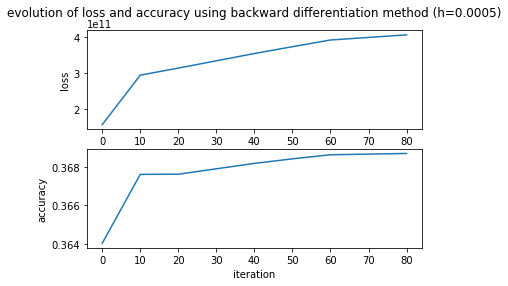

In [36]:
def sgd_for_svm_demo(y, X, differentiate_method, h=0.0005):
    #differentiate_method is 'classic' / 'forward' / 'backward' / 'central'
    
    max_iter = 100
    gamma = 0.01
    lambda_ = 0.01
    data_interval = 10  
    num_examples, num_features = X.shape
    w = np.zeros(num_features)
    
    losses = []
    accuracies = []
    iters = []
    last_w = None
    
    for it in range(max_iter):
        # n = sample one data point uniformly at random data from x
        
        n = random.randint(0,num_examples-1)
        not_support = is_support(y[n], X[n], w)
        if not_support :
        
            grad = None

            if differentiate_method == 'classic' :
                grad = calculate_stochastic_gradient(y, X, w, lambda_, n, num_examples)
            else :
                grad = approximate_stochastic_gradient(y, X, w, lambda_, n, num_examples, differentiate_method, h, last_w)

            print("grad=" + str(grad))
            #if np.sum(grad) == 0 :
            #    return w

            last_w = copy.deepcopy(w)
            w -= gamma/(it+1) * grad
            #w -= gamma * grad


            if it % data_interval == 0:
                cost = calculate_primal_objective(y, X, w, lambda_)
                acc = calculate_accuracy(y, X, w)
                print(acc)
                print("l=" +str(cost)+"acc="+str(acc))
                losses.append(cost)
                iters.append(it)
                accuracies.append(acc)
        
            #print("iteration={i}, cost={c}".format(i=it, c=cost))
    
    #print("training accuracy = {l}".format(l=calculate_accuracy(y, X, w)))
    
    # Two subplots, the axes array is 1-d
    
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax1.plot(iters, losses)
    ax2.plot(iters, accuracies)
    
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('loss')
    
    ax2.set_xlabel('iteration')
    ax2.set_ylabel('accuracy')
    
    if differentiate_method == 'classic' :
        ax1.set_title('evolution of loss and accuracy using classic differentiation method', y=1.08)
        fig.savefig('plots/loss_acc_'+ differentiate_method + "_i= " + str(max_iter) + ".png" )
    else :
        ax1.set_title('evolution of loss and accuracy using ' + differentiate_method + ' differentiation method (h=' +str(h) + ')', y=1.08)
        fig.savefig('plots/loss_acc_'+ differentiate_method + '_h=' + str(h) + "_i= " + str(max_iter) +".png") 
    
    #plt.plot(iters, losses, linewidth=2.0)
    #plt.xlabel('iteration')
    #plt.ylabel('loss')
    #if differentiate_method == 'classic' :
    #    plt.title('evolution of loss using classic differentiatation method', y=1.08)
    #    plt.savefig('loss_'+ differentiate_method + ".png" )
    #else :
    #    plt.title('evolution of loss using' + differentiate_method + ' differentiation method (h=' +str(h) + ')', y=1.08)
    #    plt.savefig('loss_'+ differentiate_method + '_h=' + str(h) + ".png" )
                  

sgd_for_svm_demo(y, X, 'backward')

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


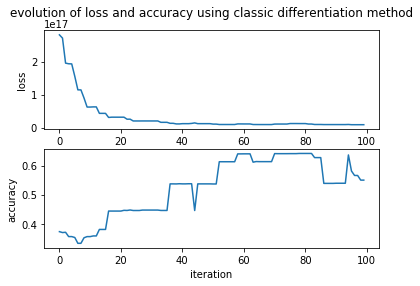

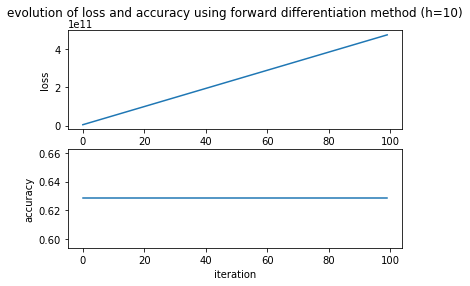

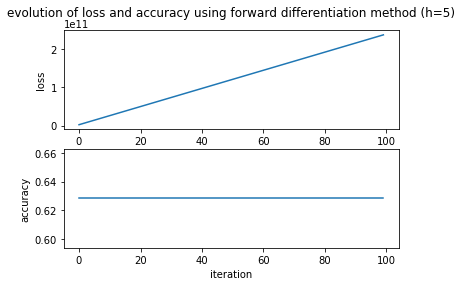

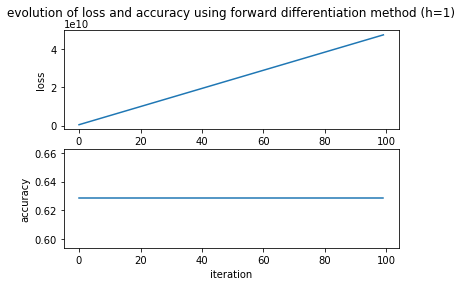

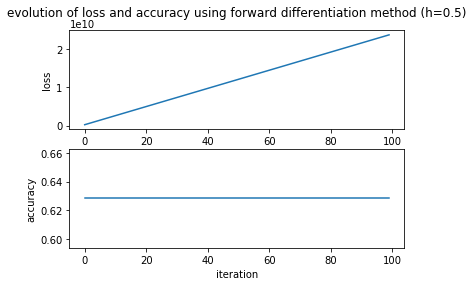

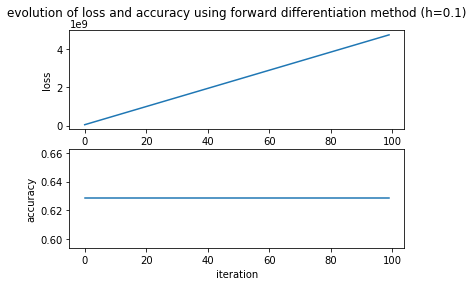

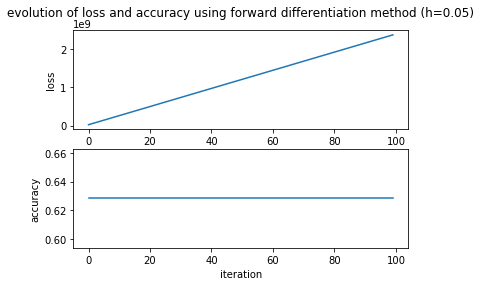

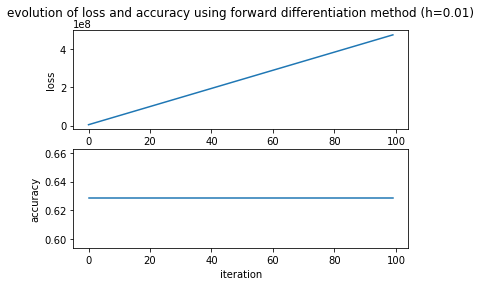

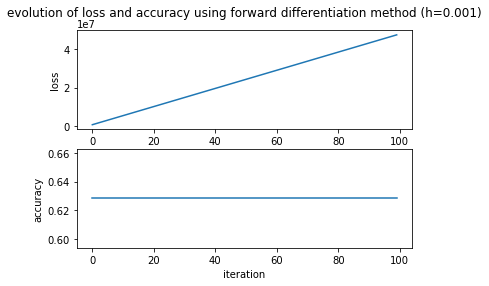

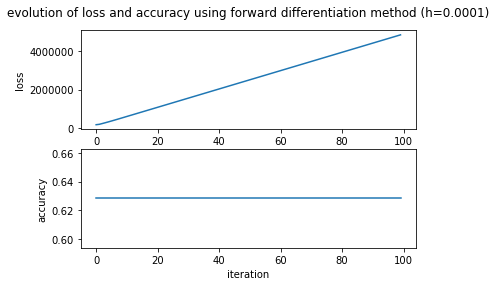

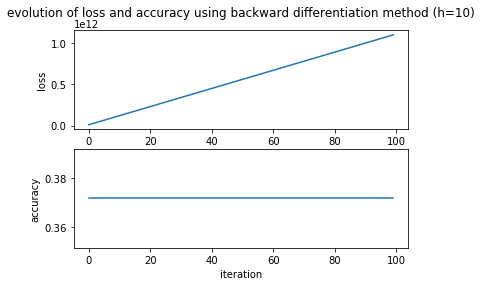

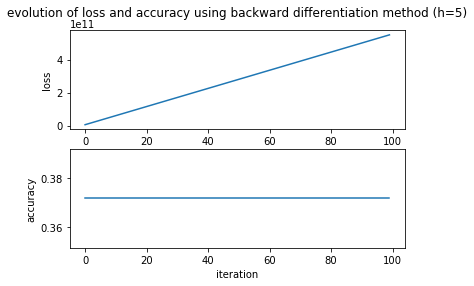

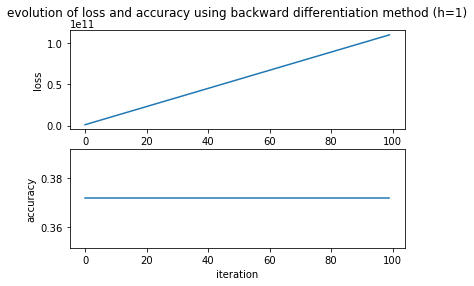

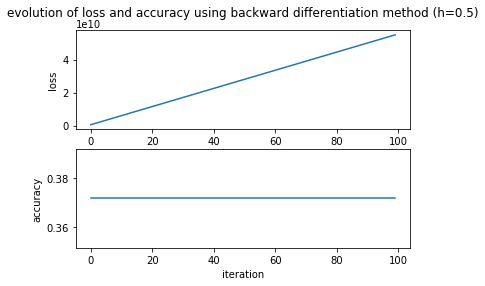

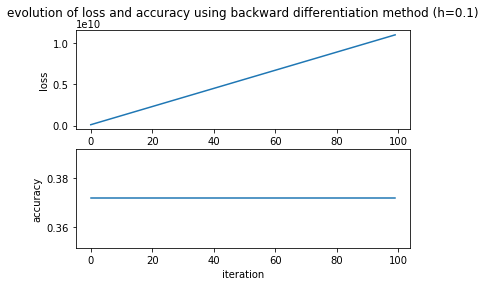

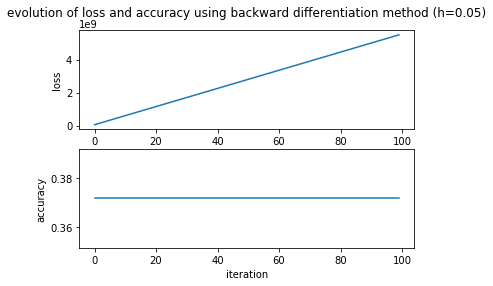

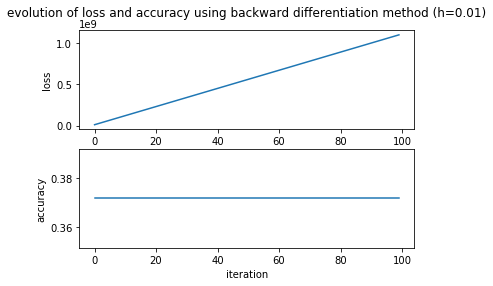

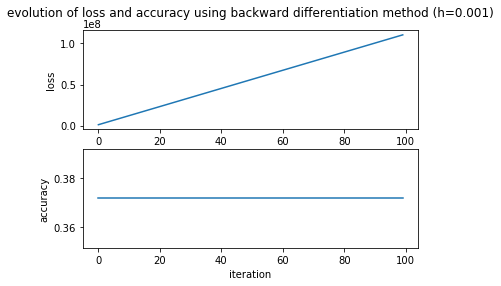

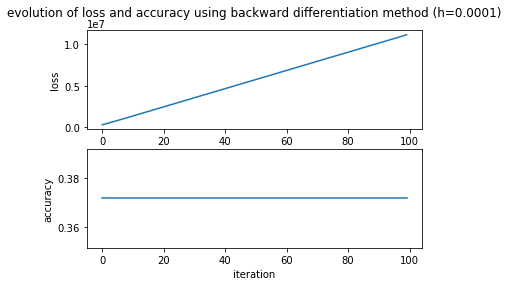

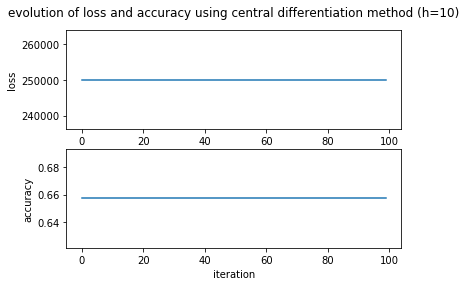

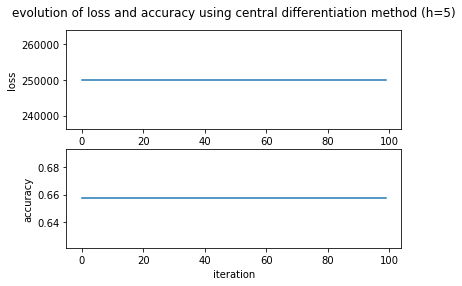

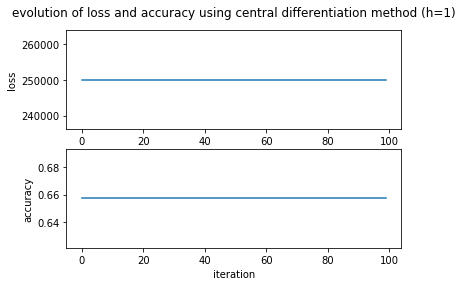

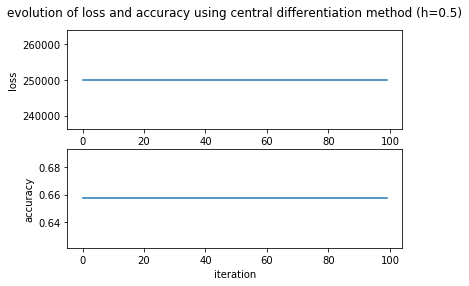

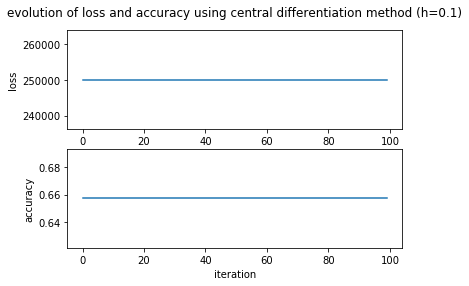

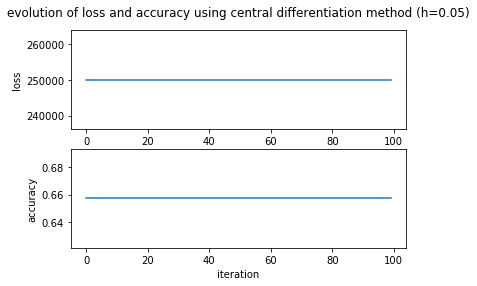

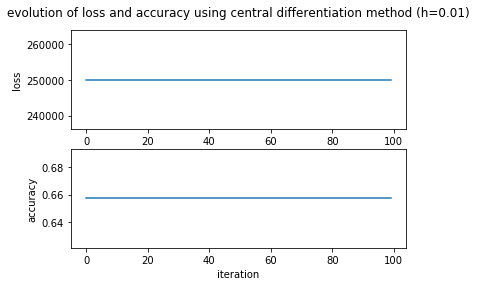

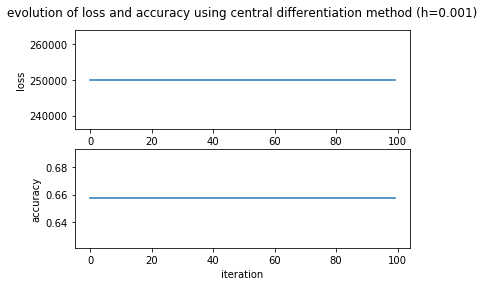

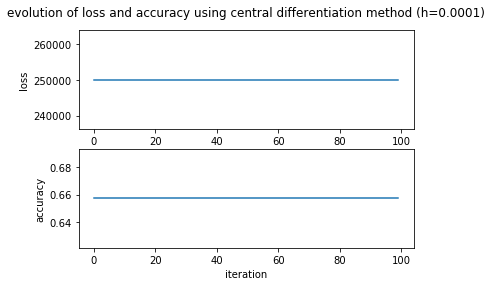

In [73]:
for method in ['classic', 'forward', 'backward', 'central'] :
    if method == 'classic' :
        sgd_for_svm_demo(y, X, method)
    else :
        for h in [10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0001] :
            sgd_for_svm_demo(y, X, method, h)


## Coordinate Descent (Ascent) for SVM

Compute the closed-form update for the n-th variable alpha, in the dual optimization problem, given alpha and the current corresponding w

In [20]:
def calculate_coordinate_update(y, X, lambda_, alpha, w, n):
    """compute a coordinate update (closed form) for coordinate n.
    X: the dataset matrix, shape = (num_examples, num_features)
    y: the corresponding +1 or -1 labels, shape = (num_examples)
    w: shape = (num_examples)
    n: the coordinate to be updated
    """        
    # calculate the update of coordinate at index=n.
    x_n, y_n = X[n], y[n]
    old_alpha_n = np.copy(alpha[n])
    
    g = (y_n * x_n.dot(w) - 1)

    if old_alpha_n == 0:
        g = min(g, 0)
    elif old_alpha_n == 1.0:
        g = max(g, 0)
    else:
        g = g
    if g != 0:
        alpha[n] = min(
            max(old_alpha_n - lambda_ * g / (x_n.T.dot(x_n)), 0.0),
            1.0)
    
        # compute the corresponding update on the primal vector w
        w += 1.0 / lambda_ * (alpha[n] - old_alpha_n) * y_n * x_n
    return w, alpha

In [21]:
def calculate_dual_objective(y, X, w, alpha, lambda_):
    """calculate the objective for the dual problem."""
    return np.sum(alpha)  - lambda_ / 2.0 * np.sum(w ** 2) # w = 1/lambda * X * Y * alpha

In [23]:
def coordinate_descent_for_svm_demo(y, X):
    max_iter = 1000000
    lambda_ = 0.01

    num_examples, num_features = X.shape
    w = np.zeros(num_features)
    alpha = np.zeros(num_examples)
    
    for it in range(max_iter):
        # n = sample one data point uniformly at random data from x
        n = random.randint(0,num_examples-1)
        
        w, alpha = calculate_coordinate_update(y, X, lambda_, alpha, w, n)
            
        if it % 10000 == 0:
            # primal objective
            primal_value = calculate_primal_objective(y, X, w, lambda_)
            # dual objective
            dual_value = calculate_dual_objective(y, X, w, alpha, lambda_)
            # primal dual gap
            duality_gap = primal_value - dual_value
            print('iteration=%i, primal:%.5f, dual:%.5f, gap:%.5f'%(
                    it, primal_value, dual_value, duality_gap))
    print("training accuracy = {l}".format(l=calculate_accuracy(y, X, w)))

coordinate_descent_for_svm_demo(y_train, x_train)

iteration=0, primal:6003.21766, dual:-80.21761, gap:6083.43528


C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


iteration=10000, primal:6003.21766, dual:-71.97291, gap:6075.19057
iteration=20000, primal:6057.86750, dual:-125.33057, gap:6183.19807
iteration=30000, primal:6057.86750, dual:-120.11498, gap:6177.98248
iteration=40000, primal:6057.86750, dual:-116.88346, gap:6174.75096
iteration=50000, primal:6057.86750, dual:-114.61378, gap:6172.48128
iteration=60000, primal:6057.86750, dual:-114.38160, gap:6172.24910
iteration=70000, primal:6057.86750, dual:-114.13428, gap:6172.00178
iteration=80000, primal:6057.86750, dual:-111.87311, gap:6169.74061
iteration=90000, primal:6057.86750, dual:-111.66917, gap:6169.53667
iteration=100000, primal:6057.86750, dual:-110.43385, gap:6168.30135
iteration=110000, primal:6057.86750, dual:-110.19085, gap:6168.05835
iteration=120000, primal:6057.86750, dual:-108.92677, gap:6166.79427
iteration=130000, primal:6057.86750, dual:-108.69608, gap:6166.56358
iteration=140000, primal:6057.86750, dual:-108.45988, gap:6166.32738
iteration=150000, primal:5923.49990, dual:26